Evolution of Innovation
=======================
By Amy Wu
Goal 1: plot distribution of patent inventors in the US  
-------------------------------------------------------
1) Data scraping:

I download files from Google USPTO Patent Grant Bibliography Data (https://www.google.com/googlebooks/uspto-patents-grants-biblio.html) Each file contains the entire front page (to include the Abstract and, if present, Statement of U.S. Government Interest) for granted patents. For example: http://storage.googleapis.com/patents/grantbib/2014/ipgb20140107_wk01.zip  
Each zip file (~12MB) includes in average 4000 patents (granted per week). There are 52 files per year. Unzip the file and find a XML file (~120MB). 
Here I programmed a shell script (fdownload.sh) to recursively download and unzip the files. 

2) Data wrangling:

Extract locations of inventors from each patent.    
The XML file contains city, state (if from the US), and country information for each inventors. 
I use a shell script (ExtractLoc1.sh) to search and collect "\city" and 2 lines (state and country) after the target lines. There is no "state" entry for foreign inventors so the 3rd line '\address' will be removed. The output file is out1.xml.  

3) Modify the file to make it a valid XML for python XML parser, output=out2.xml (ExtractLoc2.py)


In [1]:
#ExtractLoc2.py
with open("out2.xml","wt") as fout:
    with open("out1.xml","rt") as fin:
        fout.write("<locations>\n")
        fout.write("<loc>\n")
        for line in fin:
            fout.write(line.replace('--','</loc>\n<loc>')) #replace -- by </loc><loc>                           

        fout.write("</loc>\n")
        fout.write("</locations>\n")

fin.close()
fout.close()

Parse XML file and count number of inventors in each city
---------------------------------------------------------
4) Use Python XML parser (ExtractLoc3.py) 
https://docs.python.org/2/library/xml.etree.elementtree.html


In [2]:
#ExtractLoc3.py

import sys
import string
import xml.etree.ElementTree as ET

tree=ET.parse('out2.xml')
root=tree.getroot()

In [3]:
root.tag
#root.attrib

'locations'

In [4]:
root[0][1].text

'MI'

In [5]:
root[0][0].text

'Grand Rapids'

5) City counter (ExtractLoc3.py)

Return city_counts as python dictionary 

In [6]:
#count number of inventors in each city                                                                        \
import time

time1=time.time()
def city_count():
    city_counts={}
    for loc in root:#.findall('loc'):
        if loc.find('country') is None:
            continue
        country=loc.find('country').text
        
        if country=='US':  #US only                                                                             
            city=loc.find('city').text
            state=loc.find('state').text
            key="{0},{1}".format(city,state) # 'Gaithersburg,MD' 'San Francisco,CA'                                                              
            if key in city_counts.keys():
                city_counts[key]+=1
            else:
                city_counts[key]=1
            #"{0},{1}".format(location,1.)                                                                      
    time2=time.time()
    print "Time spent for counting inventors:\t",(time2-time1)
    return city_counts


In [7]:
all_city=city_count() #dictionary
print all_city

Time spent for counting inventors:	0.616537809372
{'Alma,WI': 1, 'Dana Point,CA': 2, 'Waltham,MA': 6, 'Des Peres,MO': 1, 'Minneapolis,MN': 19, 'East Amherst,NY': 2, 'Huxley,IA': 2, 'Farmington Hills,MI': 6, 'Grosse Pointe Farms,MI': 2, 'East Lyme,CT': 1, 'Wyncote,PA': 1, 'Clio,MI': 2, 'Purvis,MS': 1, 'Masury,OH': 1, 'Snoqualmie,WA': 1, 'South Amboy,NJ': 1, 'Bedford,NH': 1, 'Middleton,WI': 2, 'North Dartmouth,MA': 1, 'Tustin,CA': 6, 'Detroit,MI': 24, 'Germantown,MD': 1, 'Miamisburg,OH': 3, 'Ferndale,MI': 1, 'Greenville,DE': 1, 'Beverly Hills,CA': 8, 'Fishkill,NY': 2, 'Wayne,NJ': 3, 'Noblesville,IN': 3, 'Perry,UT': 2, 'Prior Lake,MN': 2, 'Middletown,CT': 1, 'Haliimaile,HI': 1, 'Leonia,NJ': 2, 'Providence,RI': 1, 'Princeton,NJ': 8, 'Cordova,TN': 1, 'Redington Beach,FL': 1, 'Ponte Vedra Beach,FL': 3, 'Raymore,MO': 1, 'Baldwin,WI': 2, 'Fairview Park,OH': 1, 'Moline,IL': 7, 'North Andover,MA': 2, 'Foxborough,MA': 1, 'Sylvania,OH': 2, 'Guilford,CT': 5, 'Macomb,MI': 1, 'Fairfield,NJ': 1, 'Chat

In [8]:
print all_city['Gaithersburg,MD']

4


6) There are too many cities for geographical visualization. Let's focus on the cities with the most number of inventors. 

In [9]:
import collections

def TopCity(n,city_counts):
    #sort by count                                                                                              
    time3=time.time()
    top=collections.Counter(city_counts).most_common(n)
    time4=time.time()
    print "Time spent for top  cities:\t",(time4-time3)
    return top

top10=TopCity(10,all_city)
top30=TopCity(30,all_city)#list
top40=TopCity(40,all_city)
print "Top 40 innovative cities:\t",top40

Time spent for top 10 cities:	0.00137114524841
Time spent for top 10 cities:	0.00173997879028
Time spent for top 10 cities:	0.00145292282104
Top 40 innovative cities:	[('San Jose,CA', 201), ('San Diego,CA', 166), ('Redmond,WA', 123), ('Houston,TX', 114), ('Sunnyvale,CA', 102), ('Santa Clara,CA', 97), ('Seattle,WA', 93), ('Austin,TX', 89), ('San Francisco,CA', 70), ('Palo Alto,CA', 64), ('Mountain View,CA', 63), ('New York,NY', 59), ('Armonk,NY', 57), ('Cupertino,CA', 54), ('Bellevue,WA', 52), ('Irvine,CA', 45), ('Boise,ID', 44), ('Menlo Park,CA', 39), ('Fremont,CA', 37), ('Raleigh,NC', 37), ('Rochester,NY', 36), ('Dallas,TX', 36), ('Chicago,IL', 36), ('Portland,OR', 33), ('Cary,NC', 32), ('Los Angeles,CA', 31), ('Rochester,MN', 30), ('Sammamish,WA', 29), ('Wilmington,DE', 29), ('Los Altos,CA', 28), ('St. Louis,MO', 26), ('Tucson,AZ', 26), ('Cincinnati,OH', 25), ('Detroit,MI', 24), ('Schaumburg,IL', 24), ('Cambridge,MA', 24), ('Huntsville,AL', 23), ('Milpitas,CA', 23), ('Boulder,CO', 22

7) Plot US cities on a map with matplotlib, basemap, and geopy (mapInnovation.py)


In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import time
%matplotlib inline 

scale=0.7
cm=plt.cm.get_cmap('summer')
#city_list=[('Chicago',10),('Boston',10),('New York',5),('San Francisco',25)]

def drawUS(cities):
    time1=time.time()
    map=Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=32,lat_2=45,lon_0\
=-95)
    #Load the shapefile,use the name 'states'                                                                   
    map.readshapefile('st99_d00',name='states',drawbounds=True)
    #Get the location of each city and plot it                                                                  
    geolocator=Nominatim()
    #for key in cities.keys():         #dictionary                                                           
    #    loc=geolocator.geocode(key)
    #    count=cities[key]
    max_count=cities[0][1]
    
    for (city,count) in cities:
        loc=geolocator.geocode(city)
        if loc:
            clr=float(count)/float(max_count)
            x,y=map(loc.longitude,loc.latitude)
            sc=map.scatter(x,y,marker='o',color=cm(clr),s=int(count*scale),alpha=0.8)#s=50
    
    plt.savefig('temp1.png',dpi=200)
    plt.show()
    time2=time.time()
    print "time spent:\t",(time2-time1)
    

2010 week01

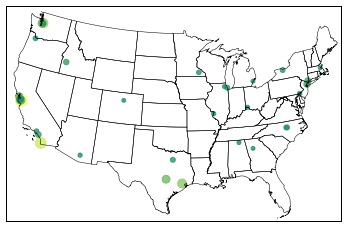

time spent:	23.8892250061


In [13]:
drawUS(top40)

Goal 2: plot number of patents granted per week from 2002-2014
-------------------------------------------------------------

1) Download and unzip 52 files per year (3GB per year) from 2002-2014 (36GB) using a Shell script (fdownload.sh). Each week contains a xml, txt, and html files. 

2) Count lines in each txt (patent id only) file


In [14]:
#Countlines in each file in the directory
import os
import sys
import glob

def GrantPerWeek(year,start,end):
    os.chdir('/Users/amywu/Desktop/InnoEvo/'+str(year))

    num={}
    for fn in glob.glob('*.txt'):
        with open(fn) as f:
            key=fn[start:end] #file name (i)pgb20140107lst.txt, remove ipgb (2005-2014) pgb(2002-2004)
            num[key]=sum(1 for line in f if line.strip() and not line.startswith('#'))

    return num


3) Create all granted patents per week dictionary 

In [15]:
#merge dictionaries
grant={}
for yr in range(2005,2015):
    g=GrantPerWeek(yr,4,12)
    grant.update(g)
    
for yr in range(2002,2005):
    g=GrantPerWeek(yr,3,11)
    grant.update(g)

print grant

{'20020205': 2187, '20071023': 3511, '20051004': 2130, '20050830': 3589, '20021001': 3275, '20120529': 5743, '20040120': 2753, '20100105': 4322, '20040127': 3335, '20110517': 4543, '20121225': 6096, '20041123': 3591, '20110524': 4536, '20060912': 4120, '20070501': 3636, '20030325': 3854, '20090317': 3778, '20120403': 5649, '20140930': 7079, '20140708': 6998, '20070508': 3625, '20110823': 5139, '20060919': 4200, '20110614': 4941, '20080722': 3317, '20060613': 4345, '20020806': 3781, '20060307': 4032, '20100907': 5131, '20030107': 3567, '20080729': 2868, '20140325': 6432, '20090825': 3720, '20030422': 3844, '20110531': 4557, '20081007': 3950, '20130917': 6181, '20040720': 3255, '20030429': 3928, '20080805': 3487, '20140218': 6367, '20020709': 3511, '20111004': 5080, '20050301': 3108, '20121127': 5946, '20021029': 3722, '20040914': 3639, '20050712': 2921, '20020730': 2304, '20080520': 3819, '20050308': 3233, '20140527': 6986, '20050719': 2821, '20141223': 4413, '20080415': 3961, '20121030

In [16]:
#sort g09 and plot number of patents versus time
import operator
sg=sorted(grant.items(), key=operator.itemgetter(0))

In [17]:
print sg  #Now it is a list

[('20020101', 2188), ('20020108', 2145), ('20020115', 1738), ('20020122', 1629), ('20020129', 2203), ('20020205', 2187), ('20020212', 2217), ('20020219', 2280), ('20020226', 2570), ('20020305', 2360), ('20020312', 3314), ('20020319', 3598), ('20020326', 3489), ('20020402', 3823), ('20020409', 3937), ('20020416', 4090), ('20020423', 3957), ('20020430', 4117), ('20020507', 4423), ('20020514', 4098), ('20020521', 4431), ('20020528', 4087), ('20020604', 4304), ('20020611', 4449), ('20020618', 3403), ('20020625', 4220), ('20020702', 3644), ('20020709', 3511), ('20020716', 3643), ('20020723', 3579), ('20020730', 2304), ('20020806', 3781), ('20020813', 4344), ('20020820', 4338), ('20020827', 4227), ('20020903', 3883), ('20020910', 3852), ('20020917', 4010), ('20020924', 4293), ('20021001', 3275), ('20021008', 3708), ('20021015', 3818), ('20021022', 3745), ('20021029', 3722), ('20021105', 4075), ('20021112', 3659), ('20021119', 3591), ('20021126', 3793), ('20021203', 3441), ('20021210', 3562),

In [18]:
print sg[311][0],sg[311][1]
print len(sg)

20071218 2523
678


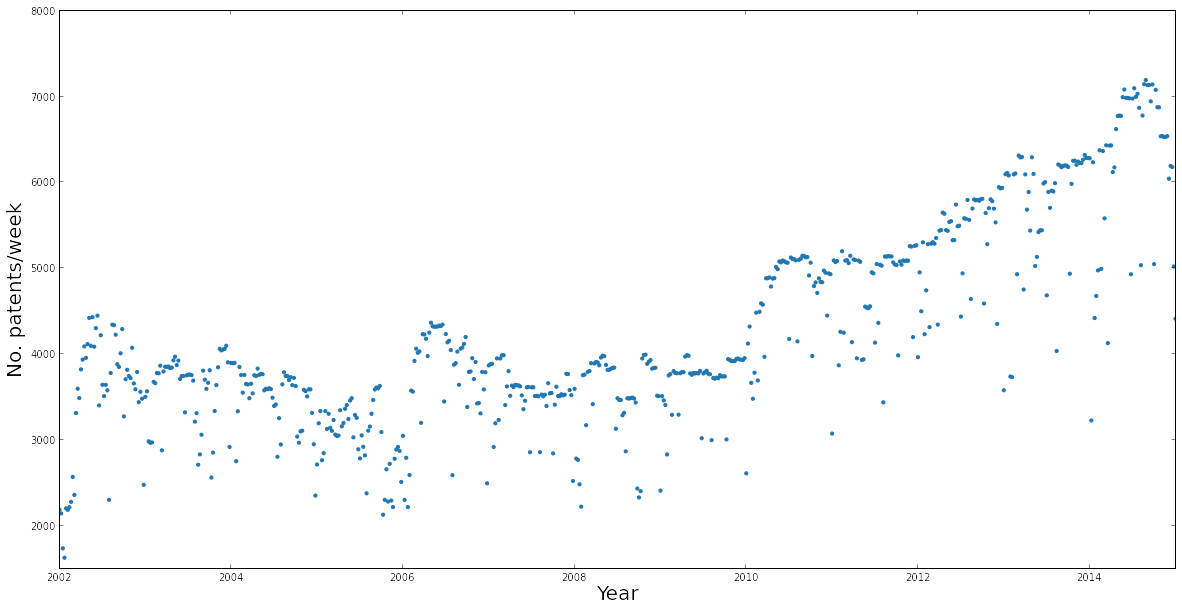

In [20]:
#plot sg vs time
yr_i=2002
fig, ax = plt.subplots(figsize=(20,10))

for i in range(len(sg)):
    x=float(i)/52+yr_i
    y=sg[i][1]
    plt.scatter(x,y,color='#1f77b4',s=10)

plt.axis([yr_i,2015,1500,8000])
plt.xlabel('Year', fontsize=20)
plt.ylabel('No. patents/week', fontsize=20)
plt.show()